# Breast Cancer Detection using Logistic Regression

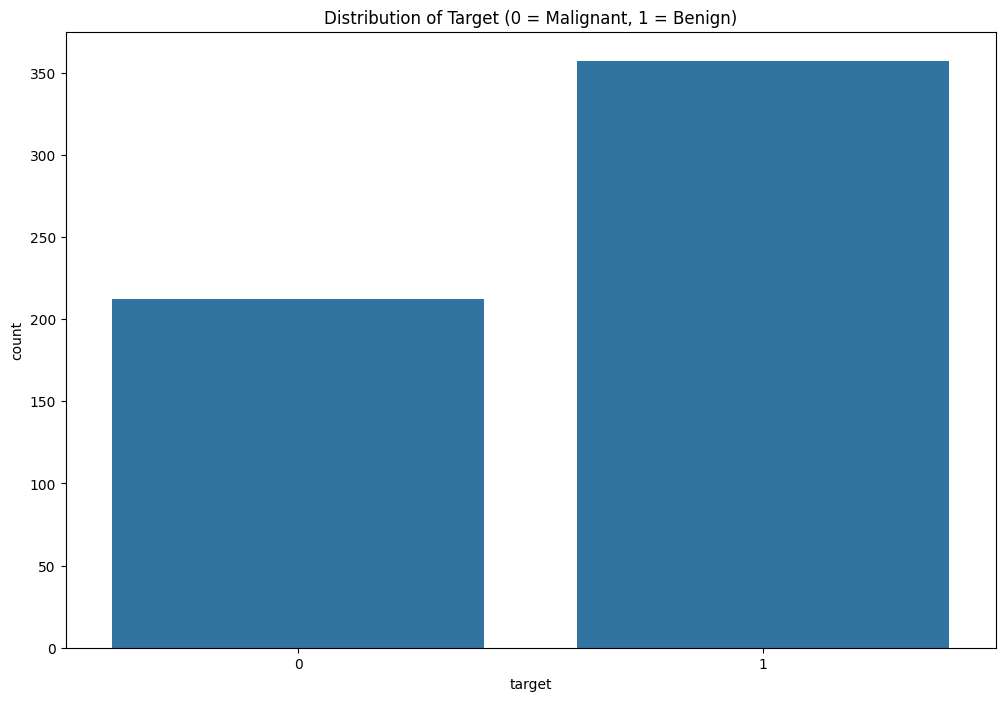

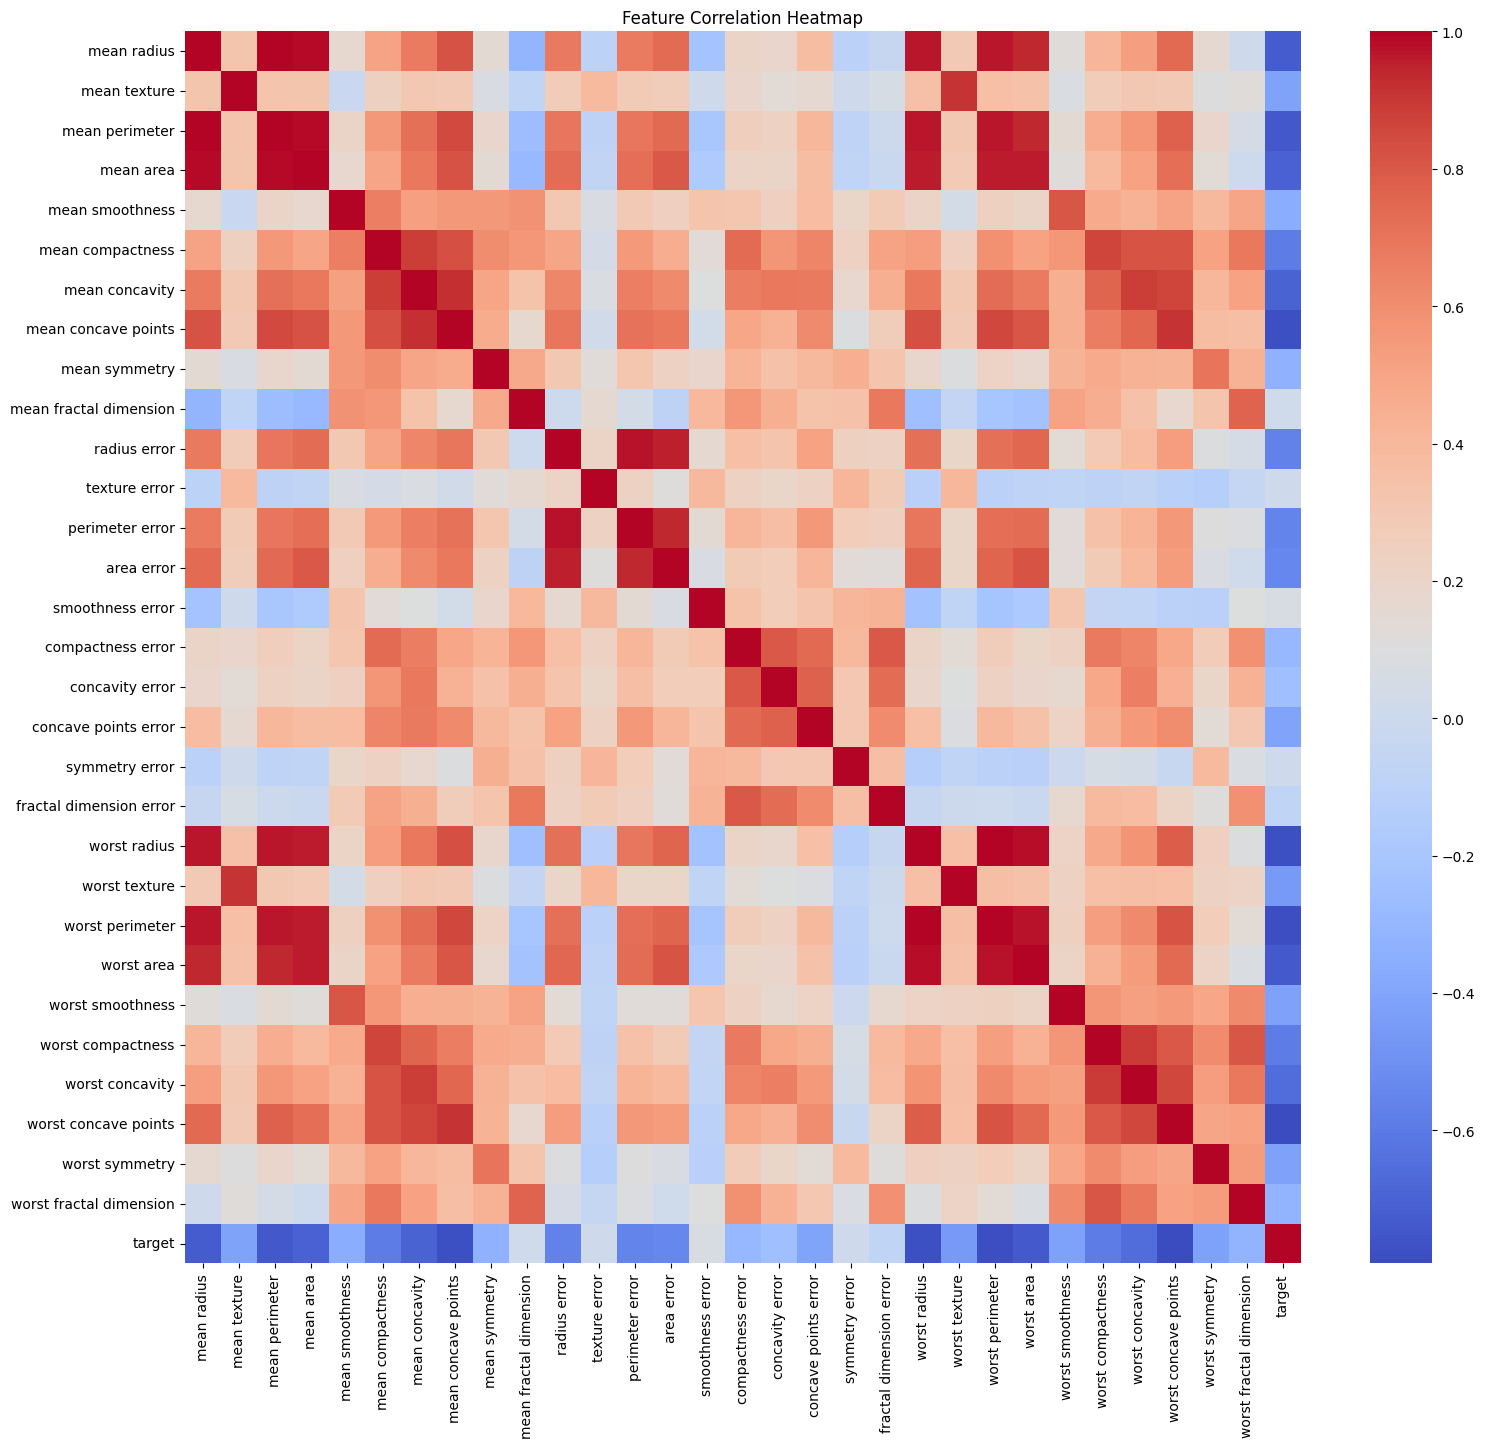

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Distribution of target
plt.figure(figsize=(12, 8))
sns.countplot(x='target', data=df)
plt.title("Distribution of Target (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  2]
 [ 1 70]]
Accuracy Score:
0.9736842105263158


In [5]:
import joblib

joblib.dump(model, "breast_cancer_model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']